## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9474618	total: 48.5ms	remaining: 48.4s
1:	learn: 0.9274963	total: 49.4ms	remaining: 24.7s
2:	learn: 0.9058989	total: 50.6ms	remaining: 16.8s
3:	learn: 0.8890994	total: 51.8ms	remaining: 12.9s
4:	learn: 0.8726805	total: 53ms	remaining: 10.5s
5:	learn: 0.8555222	total: 54ms	remaining: 8.95s
6:	learn: 0.8395868	total: 55ms	remaining: 7.8s
7:	learn: 0.8232329	total: 56.1ms	remaining: 6.96s
8:	learn: 0.8078526	total: 57.1ms	remaining: 6.29s
9:	learn: 0.7918951	total: 58.2ms	remaining: 5.76s
10:	learn: 0.7780302	total: 59.2ms	remaining: 5.33s
11:	learn: 0.7629104	total: 60.4ms	remaining: 4.97s
12:	learn: 0.7481694	total: 61.4ms	remaining: 4.66s
13:	learn: 0.7329390	total: 62.4ms	remaining: 4.39s
14:	learn: 0.7214805	total: 63.4ms	remaining: 4.16s
15:	learn: 0.7075545	total: 64.5ms	remaining: 3.97s
16:	learn: 0.6956949	total: 65.7ms	remaining: 3.8s
17:	learn: 0.6838089	total: 66.7ms	remaining: 3.64s
18:	learn: 0.6722074	total: 67.7ms	remaining: 3.5s
19

85:	learn: 0.3281549	total: 141ms	remaining: 1.5s
86:	learn: 0.3263936	total: 143ms	remaining: 1.5s
87:	learn: 0.3241987	total: 144ms	remaining: 1.49s
88:	learn: 0.3223181	total: 145ms	remaining: 1.48s
89:	learn: 0.3198564	total: 146ms	remaining: 1.47s
90:	learn: 0.3178820	total: 147ms	remaining: 1.46s
91:	learn: 0.3164431	total: 148ms	remaining: 1.46s
92:	learn: 0.3154332	total: 149ms	remaining: 1.45s
93:	learn: 0.3140260	total: 150ms	remaining: 1.44s
94:	learn: 0.3124253	total: 151ms	remaining: 1.44s
95:	learn: 0.3111633	total: 152ms	remaining: 1.43s
96:	learn: 0.3098502	total: 153ms	remaining: 1.42s
97:	learn: 0.3086888	total: 154ms	remaining: 1.42s
98:	learn: 0.3071858	total: 155ms	remaining: 1.41s
99:	learn: 0.3055780	total: 156ms	remaining: 1.4s
100:	learn: 0.3048155	total: 157ms	remaining: 1.4s
101:	learn: 0.3034149	total: 158ms	remaining: 1.39s
102:	learn: 0.3018797	total: 159ms	remaining: 1.39s
103:	learn: 0.3005914	total: 160ms	remaining: 1.38s
104:	learn: 0.2994383	total: 16

212:	learn: 0.2130329	total: 275ms	remaining: 1.02s
213:	learn: 0.2125137	total: 276ms	remaining: 1.01s
214:	learn: 0.2121185	total: 277ms	remaining: 1.01s
215:	learn: 0.2114855	total: 279ms	remaining: 1.01s
216:	learn: 0.2110527	total: 280ms	remaining: 1.01s
217:	learn: 0.2108072	total: 281ms	remaining: 1.01s
218:	learn: 0.2105942	total: 282ms	remaining: 1s
219:	learn: 0.2098891	total: 283ms	remaining: 1s
220:	learn: 0.2093013	total: 284ms	remaining: 1s
221:	learn: 0.2088400	total: 285ms	remaining: 999ms
222:	learn: 0.2086713	total: 286ms	remaining: 997ms
223:	learn: 0.2081317	total: 287ms	remaining: 995ms
224:	learn: 0.2077415	total: 288ms	remaining: 993ms
225:	learn: 0.2072743	total: 289ms	remaining: 991ms
226:	learn: 0.2065347	total: 290ms	remaining: 989ms
227:	learn: 0.2060415	total: 292ms	remaining: 987ms
228:	learn: 0.2052588	total: 293ms	remaining: 986ms
229:	learn: 0.2050604	total: 294ms	remaining: 984ms
230:	learn: 0.2044311	total: 295ms	remaining: 982ms
231:	learn: 0.2039014

331:	learn: 0.1667362	total: 403ms	remaining: 811ms
332:	learn: 0.1666562	total: 404ms	remaining: 810ms
333:	learn: 0.1663504	total: 406ms	remaining: 809ms
334:	learn: 0.1659918	total: 407ms	remaining: 807ms
335:	learn: 0.1658111	total: 408ms	remaining: 806ms
336:	learn: 0.1657514	total: 409ms	remaining: 804ms
337:	learn: 0.1653854	total: 410ms	remaining: 803ms
338:	learn: 0.1650763	total: 411ms	remaining: 801ms
339:	learn: 0.1646804	total: 412ms	remaining: 800ms
340:	learn: 0.1641215	total: 413ms	remaining: 798ms
341:	learn: 0.1636551	total: 414ms	remaining: 797ms
342:	learn: 0.1632462	total: 415ms	remaining: 795ms
343:	learn: 0.1627497	total: 416ms	remaining: 794ms
344:	learn: 0.1623330	total: 417ms	remaining: 792ms
345:	learn: 0.1619286	total: 418ms	remaining: 790ms
346:	learn: 0.1618824	total: 419ms	remaining: 789ms
347:	learn: 0.1618377	total: 420ms	remaining: 787ms
348:	learn: 0.1617548	total: 421ms	remaining: 786ms
349:	learn: 0.1616612	total: 422ms	remaining: 784ms
350:	learn: 

456:	learn: 0.1329288	total: 532ms	remaining: 632ms
457:	learn: 0.1326086	total: 533ms	remaining: 631ms
458:	learn: 0.1323681	total: 534ms	remaining: 630ms
459:	learn: 0.1321209	total: 535ms	remaining: 629ms
460:	learn: 0.1320722	total: 536ms	remaining: 627ms
461:	learn: 0.1318809	total: 537ms	remaining: 626ms
462:	learn: 0.1316011	total: 538ms	remaining: 624ms
463:	learn: 0.1313341	total: 539ms	remaining: 623ms
464:	learn: 0.1309406	total: 540ms	remaining: 621ms
465:	learn: 0.1306747	total: 541ms	remaining: 620ms
466:	learn: 0.1306437	total: 542ms	remaining: 619ms
467:	learn: 0.1305328	total: 543ms	remaining: 618ms
468:	learn: 0.1302037	total: 544ms	remaining: 616ms
469:	learn: 0.1299433	total: 545ms	remaining: 615ms
470:	learn: 0.1296993	total: 546ms	remaining: 614ms
471:	learn: 0.1293585	total: 547ms	remaining: 612ms
472:	learn: 0.1292028	total: 548ms	remaining: 611ms
473:	learn: 0.1288807	total: 549ms	remaining: 610ms
474:	learn: 0.1286170	total: 550ms	remaining: 608ms
475:	learn: 

583:	learn: 0.1068999	total: 669ms	remaining: 476ms
584:	learn: 0.1066393	total: 670ms	remaining: 476ms
585:	learn: 0.1065356	total: 671ms	remaining: 474ms
586:	learn: 0.1064975	total: 673ms	remaining: 473ms
587:	learn: 0.1063061	total: 674ms	remaining: 472ms
588:	learn: 0.1060822	total: 675ms	remaining: 471ms
589:	learn: 0.1059671	total: 676ms	remaining: 470ms
590:	learn: 0.1056427	total: 677ms	remaining: 468ms
591:	learn: 0.1053571	total: 678ms	remaining: 467ms
592:	learn: 0.1053423	total: 679ms	remaining: 466ms
593:	learn: 0.1050864	total: 680ms	remaining: 465ms
594:	learn: 0.1049988	total: 681ms	remaining: 464ms
595:	learn: 0.1047545	total: 683ms	remaining: 463ms
596:	learn: 0.1045474	total: 684ms	remaining: 461ms
597:	learn: 0.1045229	total: 685ms	remaining: 460ms
598:	learn: 0.1043167	total: 686ms	remaining: 459ms
599:	learn: 0.1042082	total: 687ms	remaining: 458ms
600:	learn: 0.1040283	total: 688ms	remaining: 457ms
601:	learn: 0.1038841	total: 689ms	remaining: 456ms
602:	learn: 

711:	learn: 0.0858475	total: 806ms	remaining: 326ms
712:	learn: 0.0856876	total: 808ms	remaining: 325ms
713:	learn: 0.0855444	total: 809ms	remaining: 324ms
714:	learn: 0.0853698	total: 810ms	remaining: 323ms
715:	learn: 0.0852197	total: 811ms	remaining: 322ms
716:	learn: 0.0850449	total: 812ms	remaining: 321ms
717:	learn: 0.0849481	total: 813ms	remaining: 319ms
718:	learn: 0.0848502	total: 815ms	remaining: 318ms
719:	learn: 0.0847816	total: 816ms	remaining: 317ms
720:	learn: 0.0847429	total: 817ms	remaining: 316ms
721:	learn: 0.0846165	total: 818ms	remaining: 315ms
722:	learn: 0.0844817	total: 819ms	remaining: 314ms
723:	learn: 0.0843644	total: 819ms	remaining: 312ms
724:	learn: 0.0841735	total: 820ms	remaining: 311ms
725:	learn: 0.0841119	total: 821ms	remaining: 310ms
726:	learn: 0.0840136	total: 822ms	remaining: 309ms
727:	learn: 0.0838874	total: 823ms	remaining: 308ms
728:	learn: 0.0837754	total: 824ms	remaining: 306ms
729:	learn: 0.0836678	total: 826ms	remaining: 305ms
730:	learn: 

839:	learn: 0.0710424	total: 938ms	remaining: 179ms
840:	learn: 0.0709504	total: 940ms	remaining: 178ms
841:	learn: 0.0709400	total: 941ms	remaining: 177ms
842:	learn: 0.0708079	total: 942ms	remaining: 175ms
843:	learn: 0.0706866	total: 943ms	remaining: 174ms
844:	learn: 0.0705431	total: 944ms	remaining: 173ms
845:	learn: 0.0704817	total: 945ms	remaining: 172ms
846:	learn: 0.0704089	total: 946ms	remaining: 171ms
847:	learn: 0.0702371	total: 947ms	remaining: 170ms
848:	learn: 0.0700856	total: 948ms	remaining: 169ms
849:	learn: 0.0700382	total: 949ms	remaining: 167ms
850:	learn: 0.0699003	total: 950ms	remaining: 166ms
851:	learn: 0.0697697	total: 951ms	remaining: 165ms
852:	learn: 0.0696291	total: 952ms	remaining: 164ms
853:	learn: 0.0694963	total: 953ms	remaining: 163ms
854:	learn: 0.0694337	total: 954ms	remaining: 162ms
855:	learn: 0.0693526	total: 955ms	remaining: 161ms
856:	learn: 0.0691950	total: 956ms	remaining: 160ms
857:	learn: 0.0691826	total: 957ms	remaining: 158ms
858:	learn: 

966:	learn: 0.0604659	total: 1.07s	remaining: 36.5ms
967:	learn: 0.0603982	total: 1.07s	remaining: 35.5ms
968:	learn: 0.0603291	total: 1.07s	remaining: 34.3ms
969:	learn: 0.0602680	total: 1.07s	remaining: 33.2ms
970:	learn: 0.0601973	total: 1.07s	remaining: 32.1ms
971:	learn: 0.0601736	total: 1.08s	remaining: 31ms
972:	learn: 0.0600680	total: 1.08s	remaining: 29.9ms
973:	learn: 0.0599970	total: 1.08s	remaining: 28.8ms
974:	learn: 0.0598908	total: 1.08s	remaining: 27.7ms
975:	learn: 0.0598225	total: 1.08s	remaining: 26.6ms
976:	learn: 0.0597562	total: 1.08s	remaining: 25.5ms
977:	learn: 0.0597477	total: 1.08s	remaining: 24.4ms
978:	learn: 0.0596185	total: 1.08s	remaining: 23.2ms
979:	learn: 0.0594760	total: 1.08s	remaining: 22.1ms
980:	learn: 0.0593968	total: 1.08s	remaining: 21ms
981:	learn: 0.0592488	total: 1.09s	remaining: 19.9ms
982:	learn: 0.0591792	total: 1.09s	remaining: 18.8ms
983:	learn: 0.0591144	total: 1.09s	remaining: 17.7ms
984:	learn: 0.0591068	total: 1.09s	remaining: 16.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

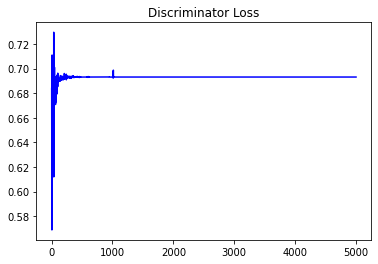

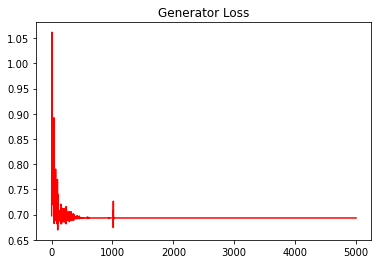

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

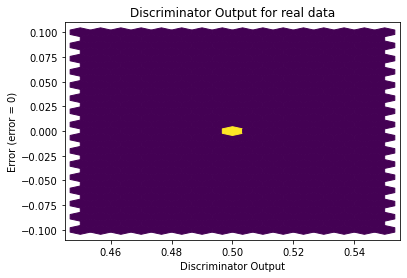

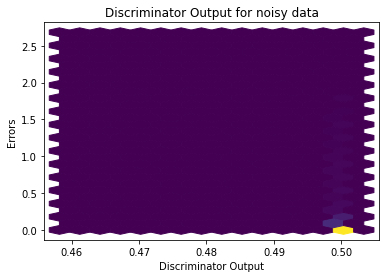

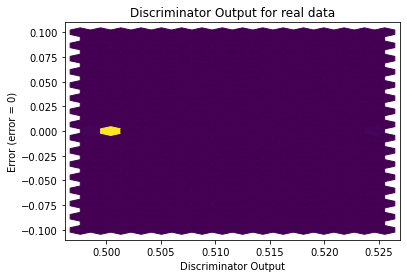

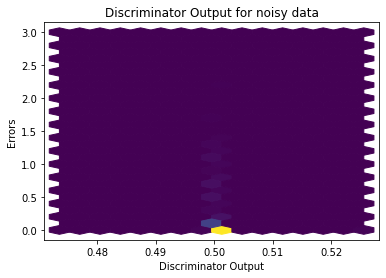

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


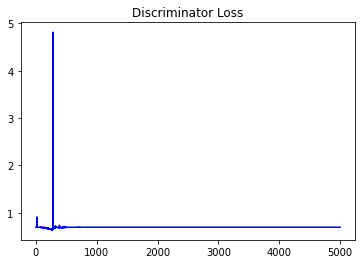

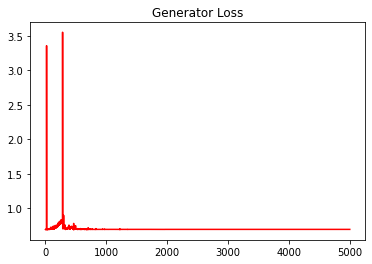

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

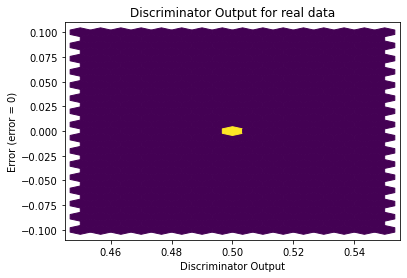

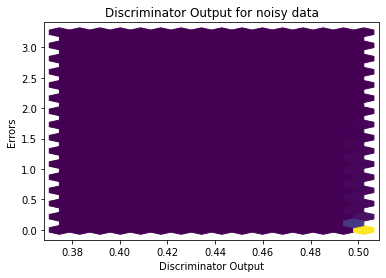

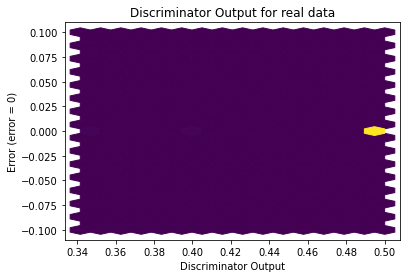

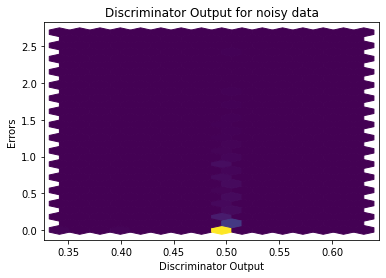

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0036]], device='cuda:0', requires_grad=True)
